In [157]:
import pandas as pd
df = pd.read_excel('korean_lotto.csv')
df1 = pd.read_excel('fake_lotto.csv')

In [1]:
## 워드 클라우드 생성을 위한 패키지
from wordcloud import WordCloud

## 워드클라우드 모양을 변형시키고자 하는 이미지 활용에 사용 패키지
from PIL import Image
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [161]:
df = df.sheets(1).used_range.options(pd.DataFrame, index = False).value
df

,NaN,TIME,NUM1,NUM2,NUM3,NUM4,NUM5,NUM6,BONUS_NUM
0,0.0,1.0,10.0,23.0,29.0,33.0,37.0,40.0,16.0
1,1.0,2.0,9.0,13.0,21.0,25.0,32.0,42.0,2.0
2,2.0,3.0,11.0,16.0,19.0,21.0,27.0,31.0,30.0
3,3.0,4.0,14.0,27.0,30.0,31.0,40.0,42.0,2.0
4,4.0,5.0,16.0,24.0,29.0,40.0,41.0,42.0,3.0
...,...,...,...,...,...,...,...,...,...
998,998.0,999.0,1.0,3.0,9.0,14.0,18.0,28.0,34.0
999,999.0,1000.0,2.0,8.0,19.0,22.0,32.0,42.0,39.0
1000,1000.0,1001.0,6.0,10.0,12.0,14.0,20.0,42.0,15.0
1001,1001.0,1002.0,17.0,25.0,33.0,35.0,38.0,45.0,15.0


In [162]:
df1 = df1.sheets(1).used_range.options(pd.DataFrame, index = False).value
df1

,NaN,TIME,NUM1,NUM2,NUM3,NUM4,NUM5,NUM6,BONUS
0,0.0,1.0,14.0,13.0,35.0,27.0,45.0,33.0,2.0
1,1.0,2.0,20.0,16.0,40.0,45.0,25.0,1.0,30.0
2,2.0,3.0,21.0,16.0,40.0,25.0,34.0,37.0,20.0
3,3.0,4.0,13.0,9.0,35.0,38.0,29.0,10.0,8.0
4,4.0,5.0,22.0,4.0,24.0,45.0,30.0,9.0,25.0
...,...,...,...,...,...,...,...,...,...
998,998.0,999.0,32.0,34.0,36.0,5.0,20.0,6.0,23.0
999,999.0,1000.0,29.0,43.0,20.0,27.0,19.0,17.0,11.0
1000,1000.0,1001.0,22.0,35.0,33.0,43.0,4.0,29.0,45.0
1001,1001.0,1002.0,37.0,18.0,25.0,40.0,8.0,13.0,4.0


In [163]:
number = [x for x in range(1,46)]
number

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45]

In [164]:
num1 = list(df['NUM1'].unique().astype('int'))
non_num1 = []
for i in number:
    if i not in num1:
        non_num1.append(i)

print(len(num1),len(non_num1))

29 16


In [165]:
df['NUM1'].value_counts()

1.0     143
2.0     116
3.0      98
4.0      92
5.0      82
6.0      74
7.0      63
8.0      46
10.0     39
9.0      35
11.0     34
12.0     33
14.0     28
13.0     27
16.0     21
17.0     18
19.0     12
15.0     11
18.0      7
21.0      5
22.0      4
20.0      4
23.0      3
26.0      2
24.0      2
35.0      1
25.0      1
29.0      1
27.0      1
Name: NUM1, dtype: int64

In [169]:
# 없는 번호
non_num1_1=pd.DataFrame(non_num1)
non_num1_1.columns = ['number']
non_num1_1['number']=non_num1_1['number'].astype('str')
non_num1_1['count'] = 1
non_num1_1

wc1 = non_num1_1.set_index("number").to_dict()["count"]
wc1

{'28': 1,
 '30': 1,
 '31': 1,
 '32': 1,
 '33': 1,
 '34': 1,
 '36': 1,
 '37': 1,
 '38': 1,
 '39': 1,
 '40': 1,
 '41': 1,
 '42': 1,
 '43': 1,
 '44': 1,
 '45': 1}

In [170]:
wordCloud = WordCloud(
font_path = "malgun", # 폰트 지정
width = 400, # 너비 지정
height = 400, # 높이 지정
max_font_size=100, # 가장 빈도수가 높은 단어의 폰트 사이즈 지정
background_color = 'white' # 배경색 지정
).generate_from_frequencies(wc1) #  빈도수 지정


(-0.5, 399.5, 399.5, -0.5)

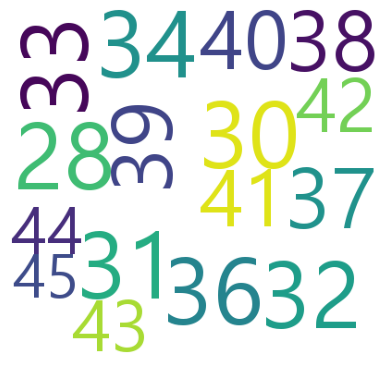

In [171]:
plt.figure()  
plt.imshow(wordCloud)
plt.axis('off')

In [172]:
number1=pd.DataFrame(df['NUM1'].value_counts())
number1.reset_index(inplace=True)
number1.columns = ['number', 'count']
number1['number']=number1['number'].astype('int')
number1['number']=number1['number'].astype('str')

wc1 = number1.set_index("number").to_dict()["count"]
wc1

{'1': 143,
 '2': 116,
 '3': 98,
 '4': 92,
 '5': 82,
 '6': 74,
 '7': 63,
 '8': 46,
 '10': 39,
 '9': 35,
 '11': 34,
 '12': 33,
 '14': 28,
 '13': 27,
 '16': 21,
 '17': 18,
 '19': 12,
 '15': 11,
 '18': 7,
 '21': 5,
 '22': 4,
 '20': 4,
 '23': 3,
 '26': 2,
 '24': 2,
 '35': 1,
 '25': 1,
 '29': 1,
 '27': 1}

In [173]:
# 첫번째 번호 자주 등장하는 번호 10가지
fig = px.bar(number1[:10], x='count', y='number', 
             color = 'number', color_discrete_sequence = px.colors.qualitative.Pastel)
fig.update_traces(
    textfont_size=14, 
    textposition='auto',
)

In [174]:
# 첫번째 번호 전체 빈도수
fig = px.bar(number1, x='count', y='number', 
             color = 'number', color_discrete_sequence = px.colors.qualitative.Pastel)
fig.update_traces(
    textfont_size=14, 
    textposition='auto',
)

In [175]:
# 빈도수에 따른 워드 클라우드
wordCloud = WordCloud(
font_path = "malgun", # 폰트 지정
width = 400, # 워드 클라우드의 너비 지정
height = 400, # 워드클라우드의 높이 지정
max_font_size=100, # 가장 빈도수가 높은 단어의 폰트 사이즈 지정
background_color = 'white' # 배경색 지정
).generate_from_frequencies(wc) # 워드 클라우드 빈도수 지정


(-0.5, 399.5, 399.5, -0.5)

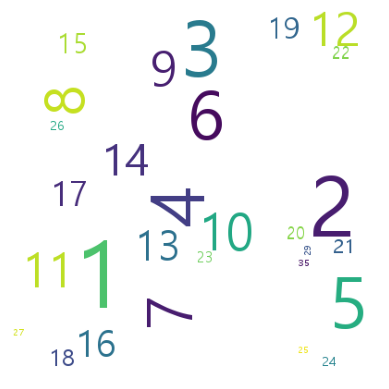

In [176]:
plt.figure()  
plt.imshow(wordCloud)
plt.axis('off')

In [177]:
num2 = list(df['NUM2'].unique().astype('int'))
non_num2 = []
for i in number:
    if i not in num2:
        non_num2.append(i)

print(len(num2),len(non_num2))

35 10


In [178]:
non_num2_1=pd.DataFrame(non_num2)
non_num2_1.columns = ['number']
non_num2_1['number']=non_num2_1['number'].astype('str')
non_num2_1['count'] = 1
non_num2_1

non2 = non_num2_1.set_index("number").to_dict()["count"]
non2

{'1': 1,
 '35': 1,
 '38': 1,
 '39': 1,
 '40': 1,
 '41': 1,
 '42': 1,
 '43': 1,
 '44': 1,
 '45': 1}

In [179]:
wordCloud = WordCloud(
font_path = "malgun", # 폰트 지정
width = 400, #  너비 지정
height = 400, #  높이 지정
max_font_size=100, # 가장 빈도수가 높은 단어의 폰트 사이즈 지정
background_color = 'white' # 배경색 지정
).generate_from_frequencies(non2) #  빈도수 지정


(-0.5, 399.5, 399.5, -0.5)

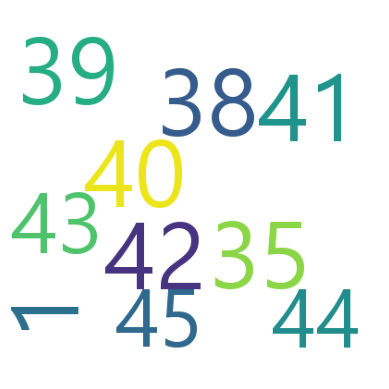

In [180]:
plt.figure()  
plt.imshow(wordCloud)
plt.axis('off')

In [181]:
number2=pd.DataFrame(df['NUM2'].value_counts())
number2.reset_index(inplace=True)
number2.columns = ['number', 'count']
number2['number']=number2['number'].astype('int')
number2['number']=number2['number'].astype('str')

wc2 = number2.set_index("number").to_dict()["count"]
wc2

{'10': 65,
 '8': 64,
 '7': 59,
 '12': 58,
 '11': 58,
 '15': 51,
 '9': 51,
 '13': 47,
 '14': 47,
 '18': 45,
 '17': 43,
 '4': 43,
 '5': 42,
 '6': 38,
 '16': 33,
 '3': 33,
 '21': 29,
 '20': 29,
 '19': 26,
 '2': 20,
 '22': 20,
 '23': 19,
 '25': 17,
 '27': 15,
 '24': 14,
 '26': 9,
 '30': 6,
 '29': 5,
 '28': 4,
 '32': 3,
 '34': 3,
 '31': 2,
 '36': 2,
 '33': 2,
 '37': 1}

In [182]:
# 두번째 번호 자주 등장하는 번호 10가지
fig = px.bar(number2[:10], x='count', y='number', 
             color = 'number', color_discrete_sequence = px.colors.qualitative.Pastel)
fig.update_traces(
    textfont_size=14, 
    textposition='auto',
)

In [183]:
# 두번째 번호 전체 빈도수
fig = px.bar(number2, x='count', y='number', 
             color = 'number', color_discrete_sequence = px.colors.qualitative.Pastel)
fig.update_traces(
    textfont_size=14, 
    textposition='auto',
)

In [184]:
# 빈도수에 따른 워드 클라우드
wordCloud = WordCloud(
font_path = "malgun", # 폰트 지정
width = 400, #  너비 지정
height = 400, #  높이 지정
max_font_size=100, # 가장 빈도수가 높은 단어의 폰트 사이즈 지정
background_color = 'white' # 배경색 지정
).generate_from_frequencies(wc2) #  빈도수 지정


(-0.5, 399.5, 399.5, -0.5)

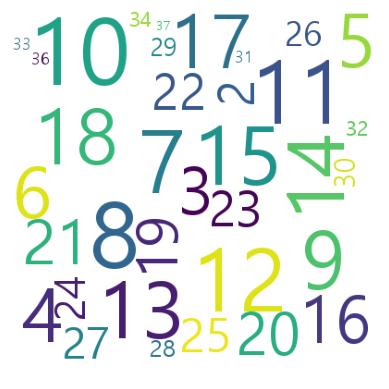

In [185]:
plt.figure()  
plt.imshow(wordCloud)
plt.axis('off')

In [186]:
num3 = list(df['NUM3'].unique().astype('int'))
non_num3 = []
for i in number:
    if i not in num3:
        non_num3.append(i)

print(len(num3),len(non_num3))

38 7


In [187]:
non_num3_1=pd.DataFrame(non_num3)
non_num3_1.columns = ['number']
non_num3_1['number']=non_num3_1['number'].astype('str')
non_num3_1['count'] = 1
non_num3_1

non3 = non_num3_1.set_index("number").to_dict()["count"]
non3

{'1': 1, '2': 1, '41': 1, '42': 1, '43': 1, '44': 1, '45': 1}

In [188]:
wordCloud = WordCloud(
font_path = "malgun", # 폰트 지정
width = 400, #  너비 지정
height = 400, # 높이 지정
max_font_size=100, # 가장 빈도수가 높은 단어의 폰트 사이즈 지정
background_color = 'white' # 배경색 지정
).generate_from_frequencies(non3) # 빈도수 지정


(-0.5, 399.5, 399.5, -0.5)

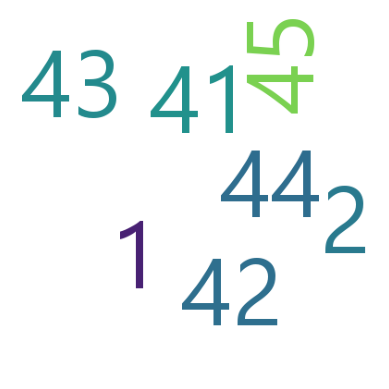

In [189]:
plt.figure()  
plt.imshow(wordCloud)
plt.axis('off')

In [190]:
number3=pd.DataFrame(df['NUM3'].value_counts())
number3.reset_index(inplace=True)
number3.columns = ['number', 'count']
number3['number']=number3['number'].astype('int')
number3['number']=number3['number'].astype('str')

wc3 = number3.set_index("number").to_dict()["count"]
wc3

{'20': 56,
 '13': 56,
 '19': 55,
 '18': 55,
 '17': 47,
 '15': 47,
 '16': 44,
 '14': 43,
 '24': 40,
 '21': 39,
 '22': 38,
 '12': 36,
 '25': 35,
 '26': 35,
 '23': 35,
 '28': 34,
 '10': 33,
 '27': 32,
 '11': 30,
 '29': 29,
 '30': 29,
 '31': 21,
 '8': 18,
 '9': 15,
 '33': 15,
 '6': 11,
 '35': 11,
 '32': 10,
 '7': 10,
 '34': 10,
 '37': 9,
 '36': 7,
 '5': 5,
 '4': 4,
 '3': 3,
 '38': 3,
 '39': 2,
 '40': 1}

In [191]:
# 세번째 번호 자주 등장하는 번호 10가지
fig = px.bar(number3[:10], x='count', y='number', 
             color = 'number', color_discrete_sequence = px.colors.qualitative.Pastel)
fig.update_traces(
    textfont_size=14, 
    textposition='auto',
)

In [192]:
# 세번째 번호 전체 빈도수
fig = px.bar(number3, x='count', y='number', 
             color = 'number', color_discrete_sequence = px.colors.qualitative.Pastel)
fig.update_traces(
    textfont_size=14, 
    textposition='auto',
)

In [193]:
# 빈도수에 따른 워드 클라우드
wordCloud = WordCloud(
font_path = "malgun", # 폰트 지정
width = 400, #  너비 지정
height = 400, # 높이 지정
max_font_size=100, # 가장 빈도수가 높은 단어의 폰트 사이즈 지정
background_color = 'white' # 배경색 지정
).generate_from_frequencies(wc3) # 빈도수 지정


(-0.5, 399.5, 399.5, -0.5)

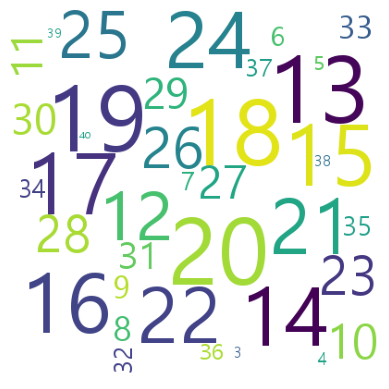

In [194]:
plt.figure()  
plt.imshow(wordCloud)
plt.axis('off')

In [195]:
num4 = list(df['NUM4'].unique().astype('int'))
non_num4 = []
for i in number:
    if i not in num4:
        non_num4.append(i)

print(len(num4),len(non_num4))

38 7


In [196]:
non_num4_1=pd.DataFrame(non_num4)
non_num4_1.columns = ['number']
non_num4_1['number']=non_num4_1['number'].astype('str')
non_num4_1['count'] = 1
non_num4_1

non4 = non_num4_1.set_index("number").to_dict()["count"]
non4

{'1': 1, '2': 1, '3': 1, '4': 1, '7': 1, '44': 1, '45': 1}

In [197]:
wordCloud = WordCloud(
font_path = "malgun", # 폰트 지정
width = 400, # 너비 지정
height = 400, # 높이 지정
max_font_size=100, # 가장 빈도수가 높은 단어의 폰트 사이즈 지정
background_color = 'white' # 배경색 지정
).generate_from_frequencies(non4) # 빈도수 지정


(-0.5, 399.5, 399.5, -0.5)

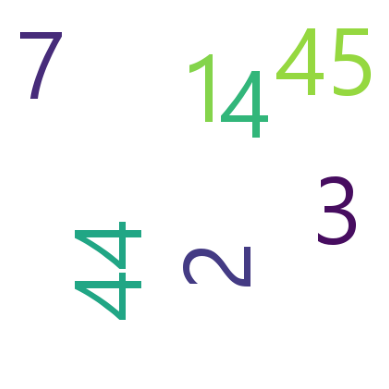

In [198]:
plt.figure()  
plt.imshow(wordCloud)
plt.axis('off')

In [199]:
number4=pd.DataFrame(df['NUM4'].value_counts())
number4.reset_index(inplace=True)
number4.columns = ['number', 'count']
number4['number']=number4['number'].astype('int')
number4['number']=number4['number'].astype('str')

wc4 = number4.set_index("number").to_dict()["count"]
wc4

{'31': 54,
 '26': 51,
 '27': 50,
 '33': 49,
 '24': 48,
 '25': 44,
 '30': 43,
 '21': 43,
 '32': 42,
 '23': 42,
 '34': 40,
 '29': 38,
 '28': 37,
 '22': 33,
 '35': 33,
 '36': 31,
 '20': 31,
 '16': 30,
 '18': 30,
 '17': 29,
 '19': 26,
 '14': 23,
 '38': 22,
 '15': 22,
 '37': 21,
 '39': 14,
 '12': 13,
 '13': 12,
 '40': 12,
 '11': 12,
 '41': 10,
 '9': 4,
 '42': 4,
 '6': 3,
 '8': 3,
 '43': 2,
 '5': 1,
 '10': 1}

In [200]:
# 네번째 번호 자주 등장하는 번호 10가지
fig = px.bar(number4[:10], x='count', y='number', 
             color = 'number', color_discrete_sequence = px.colors.qualitative.Pastel)
fig.update_traces(
    textfont_size=14, 
    textposition='auto',
)

In [201]:
# 네번째 번호 전체 빈도수
fig = px.bar(number4, x='count', y='number', 
             color = 'number', color_discrete_sequence = px.colors.qualitative.Pastel)
fig.update_traces(
    textfont_size=14, 
    textposition='auto',
)

In [202]:
# 빈도수에 따른 워드 클라우드
wordCloud = WordCloud(
font_path = "malgun", # 폰트 지정
width = 400, # 너비 지정
height = 400, # 높이 지정
max_font_size=100, # 가장 빈도수가 높은 단어의 폰트 사이즈 지정
background_color = 'white' # 배경색 지정
).generate_from_frequencies(wc4) # 빈도수 지정


(-0.5, 399.5, 399.5, -0.5)

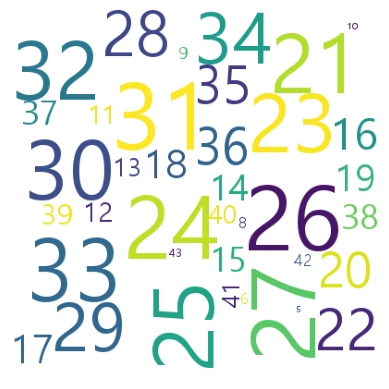

In [203]:
plt.figure()  
plt.imshow(wordCloud)
plt.axis('off')

In [204]:
num5 = list(df['NUM5'].unique().astype('int'))
non_num5 = []
for i in number:
    if i not in num5:
        non_num5.append(i)

print(len(num5),len(non_num5))

35 10


In [205]:
non_num5_1=pd.DataFrame(non_num5)
non_num5_1.columns = ['number']
non_num5_1['number']=non_num5_1['number'].astype('str')
non_num5_1['count'] = 1
non_num5_1

non5 = non_num5_1.set_index("number").to_dict()["count"]
non5

{'1': 1,
 '2': 1,
 '3': 1,
 '4': 1,
 '5': 1,
 '6': 1,
 '7': 1,
 '8': 1,
 '11': 1,
 '45': 1}

In [206]:
wordCloud = WordCloud(
font_path = "malgun", # 폰트 지정
width = 400, # 너비 지정
height = 400, # 높이 지정
max_font_size=100, # 가장 빈도수가 높은 단어의 폰트 사이즈 지정
background_color = 'white' # 배경색 지정
).generate_from_frequencies(non5) # 빈도수 지정


(-0.5, 399.5, 399.5, -0.5)

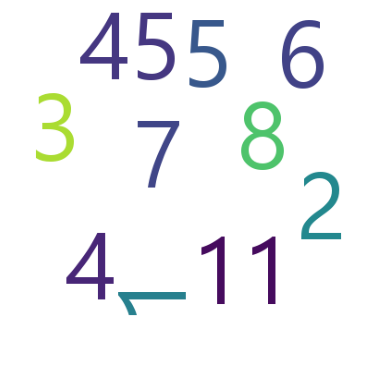

In [207]:
plt.figure()  
plt.imshow(wordCloud)
plt.axis('off')

In [208]:
number5=pd.DataFrame(df['NUM5'].value_counts())
number5.reset_index(inplace=True)
number5.columns = ['number', 'count']
number5['number']=number5['number'].astype('int')
number5['number']=number5['number'].astype('str')

wc5 = number5.set_index("number").to_dict()["count"]
wc5

{'34': 68,
 '39': 65,
 '38': 58,
 '37': 58,
 '33': 54,
 '36': 52,
 '40': 49,
 '41': 47,
 '35': 47,
 '31': 43,
 '29': 43,
 '42': 42,
 '32': 39,
 '27': 38,
 '28': 38,
 '43': 30,
 '30': 30,
 '26': 29,
 '24': 28,
 '25': 27,
 '23': 18,
 '22': 16,
 '21': 16,
 '20': 16,
 '19': 11,
 '44': 11,
 '18': 10,
 '17': 7,
 '15': 3,
 '16': 3,
 '13': 2,
 '12': 2,
 '9': 1,
 '14': 1,
 '10': 1}

In [209]:
# 다섯번째 번호 자주 등장하는 번호 10가지
fig = px.bar(number5[:10], x='count', y='number', 
             color = 'number', color_discrete_sequence = px.colors.qualitative.Pastel)
fig.update_traces(
    textfont_size=14, 
    textposition='auto',
)

In [210]:
# 다섯번째 번호 전체 빈도수
fig = px.bar(number5, x='count', y='number', 
             color = 'number', color_discrete_sequence = px.colors.qualitative.Pastel)
fig.update_traces(
    textfont_size=14, 
    textposition='auto',
)

In [211]:
# 빈도수에 따른 워드 클라우드
wordCloud = WordCloud(
font_path = "malgun", # 폰트 지정
width = 400, # 너비 지정
height = 400, # 높이 지정
max_font_size=100, # 가장 빈도수가 높은 단어의 폰트 사이즈 지정
background_color = 'white' # 배경색 지정
).generate_from_frequencies(wc5) # 빈도수 지정


(-0.5, 399.5, 399.5, -0.5)

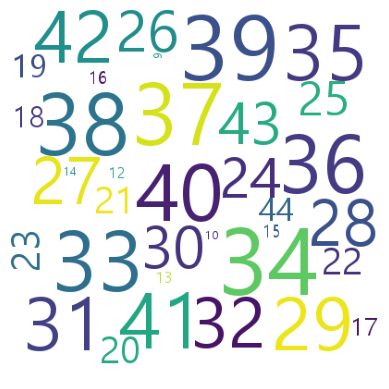

In [212]:
plt.figure()  
plt.imshow(wordCloud)
plt.axis('off')

In [213]:
num6 = list(df['NUM6'].unique().astype('int'))
non_num6 = []
for i in number:
    if i not in num6:
        non_num6.append(i)

print(len(num6),len(non_num6))

27 18


In [214]:
non_num6_1=pd.DataFrame(non_num6)
non_num6_1.columns = ['number']
non_num6_1['number']=non_num6_1['number'].astype('str')
non_num6_1['count'] = 1
non_num6_1

non6 = non_num6_1.set_index("number").to_dict()["count"]
non6

{'1': 1,
 '2': 1,
 '3': 1,
 '4': 1,
 '5': 1,
 '6': 1,
 '7': 1,
 '8': 1,
 '9': 1,
 '10': 1,
 '11': 1,
 '12': 1,
 '13': 1,
 '14': 1,
 '15': 1,
 '16': 1,
 '17': 1,
 '18': 1}

In [215]:
wordCloud = WordCloud(
font_path = "malgun", # 폰트 지정
width = 400, # 너비 지정
height = 400, # 높이 지정
max_font_size=100, # 가장 빈도수가 높은 단어의 폰트 사이즈 지정
background_color = 'white' # 배경색 지정
).generate_from_frequencies(non6) # 빈도수 지정


(-0.5, 399.5, 399.5, -0.5)

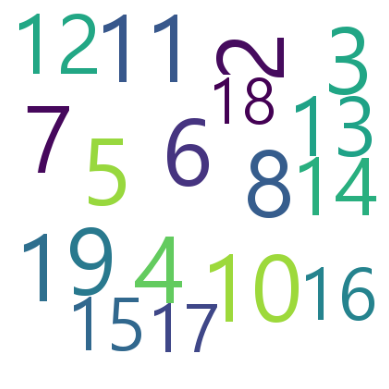

In [216]:
plt.figure()  
plt.imshow(wordCloud)
plt.axis('off')

In [217]:
number6=pd.DataFrame(df['NUM6'].value_counts())
number6.reset_index(inplace=True)
number6.columns = ['number', 'count']
number6['number']=number6['number'].astype('int')
number6['number']=number6['number'].astype('str')

wc6 = number6.set_index("number").to_dict()["count"]
wc6

{'45': 140,
 '44': 123,
 '43': 114,
 '42': 87,
 '40': 79,
 '41': 66,
 '39': 63,
 '37': 50,
 '38': 50,
 '36': 42,
 '35': 33,
 '34': 31,
 '33': 20,
 '32': 20,
 '31': 15,
 '30': 12,
 '28': 11,
 '27': 9,
 '29': 7,
 '26': 6,
 '25': 5,
 '23': 4,
 '20': 4,
 '24': 3,
 '22': 3,
 '21': 3,
 '19': 3}

In [218]:
# 여섯번째 번호 자주 등장하는 번호 10가지
fig = px.bar(number6[:10], x='count', y='number', 
             color = 'number', color_discrete_sequence = px.colors.qualitative.Pastel)
fig.update_traces(
    textfont_size=14, 
    textposition='auto',
)

In [219]:
# 여섯번째 번호 전체 빈도수
fig = px.bar(number6, x='count', y='number', 
             color = 'number', color_discrete_sequence = px.colors.qualitative.Pastel)
fig.update_traces(
    textfont_size=14, 
    textposition='auto',
)

In [220]:
# 빈도수에 따른 워드 클라우드
wordCloud = WordCloud(
font_path = "malgun", # 폰트 지정
width = 400, # 너비 지정
height = 400, # 높이 지정
max_font_size=100, # 가장 빈도수가 높은 단어의 폰트 사이즈 지정
background_color = 'white' # 배경색 지정
).generate_from_frequencies(wc6) # 빈도수 지정


(-0.5, 399.5, 399.5, -0.5)

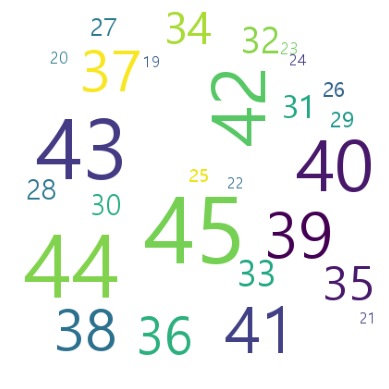

In [221]:
plt.figure()  
plt.imshow(wordCloud)
plt.axis('off')

In [222]:
BONUS_NUM = list(df['BONUS_NUM'].unique().astype('int'))
non_BONUS_NUM = []
for i in number:
    if i not in BONUS_NUM:
        non_BONUS_NUM.append(i)

print(len(BONUS_NUM),len(non_BONUS_NUM))

45 0


In [223]:
BONUS_NUM1=pd.DataFrame(df['BONUS_NUM'].value_counts())
BONUS_NUM1.reset_index(inplace=True)
BONUS_NUM1.columns = ['number', 'count']
BONUS_NUM1['number']=BONUS_NUM1['number'].astype('int')
BONUS_NUM1['number']=BONUS_NUM1['number'].astype('str')

BONUS_NUM_1 = BONUS_NUM1.set_index("number").to_dict()["count"]
BONUS_NUM_1

{'43': 34,
 '1': 29,
 '4': 28,
 '30': 28,
 '6': 28,
 '26': 28,
 '38': 27,
 '35': 27,
 '33': 27,
 '2': 27,
 '27': 26,
 '24': 26,
 '32': 26,
 '13': 26,
 '7': 25,
 '17': 25,
 '16': 25,
 '20': 24,
 '31': 23,
 '3': 23,
 '12': 23,
 '10': 23,
 '9': 23,
 '39': 22,
 '21': 21,
 '11': 21,
 '42': 21,
 '5': 20,
 '8': 20,
 '14': 20,
 '37': 20,
 '34': 19,
 '40': 19,
 '36': 19,
 '15': 19,
 '28': 18,
 '44': 18,
 '19': 18,
 '25': 17,
 '23': 17,
 '18': 16,
 '45': 15,
 '41': 15,
 '22': 14,
 '29': 13}

In [224]:
# 보너스 번호 자주 등장하는 번호 10가지
fig = px.bar(BONUS_NUM1[:10], x='count', y='number', 
             color = 'number', color_discrete_sequence = px.colors.qualitative.Pastel)
fig.update_traces(
    textfont_size=14, 
    textposition='auto',
)

In [225]:
# 보너스 번호 전체 빈도수
fig = px.bar(BONUS_NUM1, x='count', y='number', 
             color = 'number', color_discrete_sequence = px.colors.qualitative.Pastel)
fig.update_traces(
    textfont_size=14, 
    textposition='auto',
)

In [226]:
# 빈도수에 따른 워드 클라우드
wordCloud = WordCloud(
font_path = "malgun", # 폰트 지정
width = 400, # 너비 지정
height = 400, # 높이 지정
max_font_size=100, # 가장 빈도수가 높은 단어의 폰트 사이즈 지정
background_color = 'white' # 배경색 지정
).generate_from_frequencies(BONUS_NUM_1) # 빈도수 지정


(-0.5, 399.5, 399.5, -0.5)

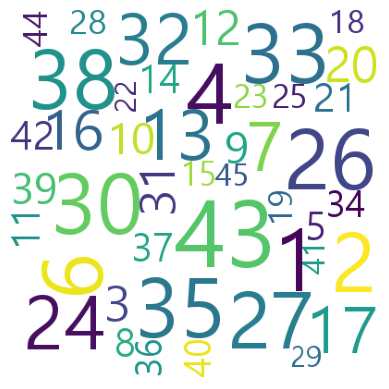

In [227]:
plt.figure()  
plt.imshow(wordCloud)
plt.axis('off')